In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Review: Monty Hall Problem
In the previous lecture, we discussed about the Monty Hall problem. The contestant pick a door, Monty opens one of the other door that contains a goat, then the contestant has to decide to stick with the original choice or to switch. 

The previous lecture might be intense in terms of codes. However, the important point is to understand the bigger picture. We want to simulate the game and see if simulating the game 1000 times would result in winning a car half of the time or it would result in winning the car more than half of the time. 

Recall the high-level steps that we need to do to carry out the whole game:
1. Put prizes behind doors randomly
2. Pick a door
3. Monty opens one of the 2 remaining doors to reveal a goat
4. Reveal all doors and see if we win a car or not

### Step 1: Set Up Game
In step 1, we constructed the game in a form of a table.

In [2]:
# Create doors labeled 1, 2, 3
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [3]:
# Create an array of prizes
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [4]:
def setup():
    """ Return a random game of Let's Make a Deal """
    return Table().with_columns(
    'Door', doors,
    'Prize', np.random.choice(prizes, 3, replace = False)
        # Recall 'replace = False' makes sure that a value that has been used can't be used anymore!
        # If this is not the case, np.random.choice could pick 'car' twice or multiple times
    )

a_game = setup()
a_game

Door,Prize
1,first goat
2,second goat
3,car


### Step 2: Pick a Door
Choose a door randomly,

In [5]:
a_guess = np.random.choice(doors)
a_guess

3

### Step 3: Monty Opens a Door
Monty opens one of the 2 doors that the contestant did not choose, and that door has to contain a goat.

In [6]:
def behind(game, door):
    """ Return the prize behind the door """
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the first goat
Behind door number 2 is the second goat
Behind door number 3 is the car


In [7]:
def location(game, prize):
    """ Return the door that hides a prize """
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 3
The first goat is behind door number 1
The second goat is behind door number 2


In [8]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 3 which hides the car
Monty Hall opens door 1 to expose the first goat


Finally, still have the last remaining door that has not been opened. The trick here is to subtract 6 with the total of the door numbers that have been opened.

In [9]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 2 hides the second goat


### Step 4: Reveal All Doors, Repeat
All that's left is to do a simulation. Let's simulate one game of the Monty Hall Problem. First we create a `game`.

In [10]:
game = setup()
game

Door,Prize
1,second goat
2,first goat
3,car


Then make the door `guess`,

In [11]:
guess = np.random.choice(doors)
guess

1

Now Monty opens a door,

In [12]:
exposed = expose(game, guess)
exposed

2

Monty opens door 2, which contains the `first goat`. Now we have the remaining unopened door,

In [13]:
remaining = other(game, guess, exposed)
remaining

3

And we can put the `guess`, `exposed`, and `remaining` all in an array.

In [14]:
[guess, exposed, remaining]

[1, 2, 3]

We can put the steps above in a single cell so that we can simulate the game multiple times. Run the cell below multiple times to see varying result.

In [15]:
game = setup()
guess = np.random.choice(doors)
exposed = expose(game, guess)
remaining = other(game, guess, exposed)
[guess, exposed, remaining]

[1, 2, 3]

The final output above is an array of door numbers. We want the prize instead of door numbers. For this reason, we use the method `behind`.

In [16]:
game = setup()
guess = np.random.choice(doors)
exposed = expose(game, guess)
remaining = other(game, guess, exposed)
[behind(game, guess), behind(game, exposed), behind(game, remaining)]

['first goat', 'second goat', 'car']

What if we want to simulate this game 10,000 times? Use a `for` loop!

In [17]:
for i in np.arange(10000):
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    [behind(game, guess), behind(game, exposed), behind(game, remaining)]

However, if we run the code above, it will not return anything! Why is that?

Recall the coin flips example, where we had an array that stores the the number of heads for every 100 coin flip simulation. Similar to that, here we need a `table` that stores the result of every simulation.

Let's say we have a table `trials`. This `trials` table can be initially constructed with just a row of labels.

In [18]:
trials = Table(['Trials', 'Guess', 'Exposed', 'Remaining'])
trials

Trials,Guess,Exposed,Remaining


Above, we have a table with only labels! We can add rows to `trials` with the `append` method.

In [19]:
trials.append([1, 'car', 'first goat', 'second goat'])

Trials,Guess,Exposed,Remaining
1,car,first goat,second goat


In [20]:
trials

Trials,Guess,Exposed,Remaining
1,car,first goat,second goat


The table now has a row! Now we can go back to our `for` loop and apply this methodology.

In [21]:
trials = Table(['Trials', 'Guess', 'Exposed', 'Remaining'])
for i in np.arange(10000):
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])

In [22]:
trials

Trials,Guess,Exposed,Remaining
0,car,second goat,first goat
1,second goat,first goat,car
2,second goat,first goat,car
3,car,first goat,second goat
4,second goat,first goat,car
5,car,second goat,first goat
6,first goat,second goat,car
7,first goat,second goat,car
8,first goat,second goat,car
9,second goat,first goat,car


How do we find out if it is more likely to win a car if we switch door?

1. Use `group` method and see how many times we will get a car
2. Visualize using a bar chart

In [23]:
trials.group('Guess')

Guess,count
car,3395
first goat,3317
second goat,3288


(0, 7000)

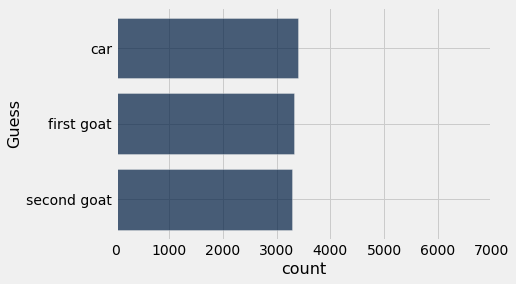

In [24]:
guess_count = trials.group('Guess').barh('Guess')
guess_count
plots.xlim(0, 7000) # Changes the x-axis limits

See that if the contestant stick to the first door choice, the chance to win a car is about 1/3.

In [25]:
trials.group('Remaining')

Remaining,count
car,6605
first goat,1667
second goat,1728


(0, 7000)

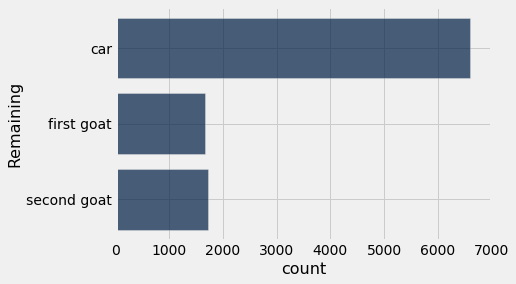

In [26]:
remaining_count = trials.group('Remaining').barh('Remaining')
remaining_count
plots.xlim(0, 7000) # Changes the x-axis limits

While if the contestant switch doors, the chance to win a car is almost doubled!

See that we do not need to do complicated math. We only need to use Python to do simulations to show that switching door gives a higher chance to win a car. However, oftentimes we need to use math, or both, to understand how things work. 

# Probability
The rules of probability govern how random events happen. If we have a coin and flip it, there's a 0% chance that the coin will become a dollar bill. 

* The lowest chance possible is 0, meaning that this event will never happen.

On the other hand, if we flip a coin, there's a 100% chance that it will stay as a coin.

* The greatest chance possible is 1 (or 100%), meaning that this event will always happen.

Probabilities sum up to 1. If we flip a coin and the coin gives `heads` 50% of the time, the other 50% would be on `tails`.If an event has a chance of 70% to happen, then the chance that it doesn't happen is:

1. 100% - 70% = 30%
2. or, 1 - 0.7 = 0.3

## Equally Likely Outcomes
One rule of probability: If some event has an outcome, and all the outcomes are equally likely, the chance that event happen is the number of ways to make it happen / total amount of outcomes.

In other words, the chance of an event **A** is happening assuming all outcomes are equally likely:
<img src = 'outcomes.jpg' width =500\>

## Demo
Imagine you have a 3 cards: green, red and blue. Put it behind your back and and shuffle it. Pull out a card. 

* It comes out green!

Now you have 2 cards left behind your back: red and blue. Pull out another one.

* Second card comes out red!

What are the chances that the consecutive event of pulling green, then red card happening?

One way of solving this is to list out the possibilities.

We have 6 possibilities of how the card drawing would happen: (`G`reen, `R`ed, `B`lue. The first letter means the 1st card drawn. The second letter means the 2nd card drawn)

1. GR
2. GB
3. RG
4. RB
5. BG
6. BR

All the 6 outcomes above are equally likely. This means the probabilty of drawing GR is 1/6.

Another way of computing this event is by multiplying probabilities together. 

1. During the first draw, we have 1/3 chance of getting the green card.
2. After we draw the green card, there are 2 cards left. Thus, we have 1/2 chance of getting the red card.

Multiply the probabilities above,

In [27]:
1/3 * 1/2

0.16666666666666666

## Fraction of a Fraction: When 2 Events Must Both Happen
This is one way of thinking about the multiplication rule.
<img src='fraction.jpg' width = 400/>

Imagine we give a set of 3 cards to each student in the class. Tell the students to draw a card, and say "those who didn't get the green card, leave the classroom.

* About 2/3 of the students will leave the classroom, while 1/3 remaining.

Now from the remaining 1/3, tell them to draw another card, and say "those who didn't get the red card, leave the classroom"

* 1/2 of that 1/3 students will remain, while the other 1/2 leaves.

And thus, the remaining students in class is:
\begin{equation*}
\frac{1}{3} \times \frac{1}{2} = \frac{1}{6}
\end{equation*}

## Multiplication Rule
The probability of both events A and B happening is the probability of A happening multiplied by the probability that B happens give that A has happened. In other words,

Probability of both = P(A happens) $\times$ P(B happens given that A has happened)

The analogy with the card drawing events is as the following,

1. The probability of both events A and B happening: probability of getting green, then red card
2. P(A happens) : Probability of getting a green card out of the 3 cards
3. P(B happens given that A has happened): Probability of getting a red card after getting the green card out of the 3 cards

If we have multiple events that need to happen consecutively, the probability of that to happen is always **less than or equal to** the chances of those individual events happening individually. The more conditions we need to satisfy, the less likely we are able to satisfy them all.

## What is the probability of getting a red and a green?
This is different from the previous question: the probability of green first then red.

If we look back to the list of possible events:

1. GR
2. GB
3. RG
4. RB
5. BG
6. BR

Both GR and RG satisfy this condition. Thus, the chance of this happening is the chance of GR + the chance of RG, which is 1/6 + 1/6 = 1/3. This is an example of the **addition rule**.

## Addition Rule
If we have an event A, in which in this case, drawing a red card and a green card in 2 draws, and that event can happen in exactly 1 of 2 ways, then the probability of the event A happening is:

#### P(A) = P(first way) + P(second way)

1. P(first way) can be drawing red first, then green
2. P(second way) can be drawing green first, then red

With the addition rule, the probability of an event A to happen is always **greater or equal to** the chance of each individual way.

## Example: At Least One Head
With a coin, what is the probability of getting at least one head in 3 tosses?

One easy way is to calculate the probability of getting all tails in 3 tosses, P(TTT), then calculate 1 - P(TTT).

1. The probability of getting all tails, P(TTT), is: 1/2 $\times$ 1/2 $\times$ 1/2, or ${\frac{1}{2}}^3$ = $\frac{1}{8}$
2. P(at least one head) = 1 - P(TTT) = 1 - $\frac{1}{8}$  = $\frac{7}{8}$

If we do 10 tosses,

1. The probability of getting all tails, P(10T) = ${\frac{1}{2}} ^ {10}$
2. Thus, the P(at least 1 head) = 1 - P(10T) = 1 - ${\frac{1}{2}} ^ {10}$, which is close to 99.9%

# Sampling
Sampling is often done in statistics. Oftentimes, we have a large group of people or population, and we just want to take a smaller portion of that because we don't have access to the whole population.

In sampling, we take a subgroup out of some groups. Some ways of getting a subgroup:

1. Deterministic Sample
    * Sampling scheme does not involve chance
    * Example: we decide to choose everyone whose name starting with letter A
    
2. Probability Sample
    * Before the sample is drawn, we need to know the probability of selecting every group of people in the population.
    * Not all individuals have to have equal chance of being selected
    
## Demo
Recall our table of 200 top-grossing movies,

In [28]:
top = Table.read_table('top_movies.csv')
# Adds a column that keeps track of the row numbers, then put that column at the left end
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


A `deterministic sample` is when we just take some data points without any chance involved. Below is an example where we just decided to take data from row 3, 5, and 8.

In [29]:
top.take(make_array(3, 5, 8))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015


Below is another example where we decided to take the movies where the title includes the string `and the`,

In [30]:
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),291710957,393033100,2005
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991


Now if we decided to choose a random number between 0 to 9,

In [31]:
start = np.random.choice(np.arange(10))

and use `start` as the starting number to take rows out of `top`, with an increment of 10,

In [32]:
top.take(np.arange(start, 200, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
14,The Lion King,Buena Vista (Disney),422783777,775573900,1994
24,Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
34,The Hunger Games: Mockingjay - Part 1,Lionsgate,337135885,354324000,2014
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
64,Home Alone,Fox,285761243,589287500,1990
74,Night at the Museum,Fox,250863268,322261900,2006
84,Beverly Hills Cop,Paramount,234760478,584205200,1984
94,Saving Private Ryan,Dreamworks,216540909,397999500,1998


**Are the data above deterministic or probability sample?**

This is a `probability` sample! This is because we can calculate the probability of getting each row in the sample. For example, the chance of getting any row greater than 9 is 1/10 since the probability of getting that row depends on the starting number that we get.

This is also called `systematic sample`, which is a special type of probability sample where we initially take a randomized step and then systematically takes sample from there.

#### What if we want to just take samples at random? Use `.sample`.
The first argument of `.sample` is the number of data points or rows we want to take. By default, `.sample` takes samples with replacement, which means that it could take duplicates. If we want to take samples without replacement, we need to add an argument `(with_replacement = False)`.

In [33]:
top.sample(10)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
46,Iron Man 2,Paramount,312433331,341908200,2010
197,Duel in the Sun,Selz.,20408163,443877500,1946
133,The Jungle Book,Disney,141843612,641015300,1967
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
50,Independence Day,Fox,306169268,602639200,1996
83,My Big Fat Greek Wedding,IFC,241438208,360349500,2002
70,The Incredibles,Buena Vista (Disney),261441092,365660600,2004
14,The Lion King,Buena Vista (Disney),422783777,775573900,1994
113,Tootsie,Columbia,177200000,495064300,1982
153,The Graduate,AVCO,104945305,744517700,1967


By default, `.sample` takes samples **with replacement**, which means that it could take duplicates. If we want to take samples **without replacement**, we need to add a second argument `with_replacement = False`.

In [34]:
top.sample(10, with_replacement = False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
143,Rocky,UA,117235147,478847800,1976
181,Sleeping Beauty,Disney,51600000,632281700,1959
17,The Hunger Games,Lionsgate,408010692,442510400,2012
33,The Lord of the Rings: The Two Towers,New Line,342551365,502210000,2002
77,Raiders of the Lost Ark,Paramount,248159971,770183000,1981
117,Home Alone 2: Lost in New York,Fox,173585516,364091400,1992
190,The Greatest Show on Earth,Paramount,36000000,522000000,1952
154,9 to 5,Fox,103290500,334062200,1980
32,American Sniper,Warner Bros.,350126372,374796000,2014
146,The Rocky Horror Picture Show,Fox,112892319,479104000,1975


## Sample of Convenience
This is another type of sample that we don't really want as a sample. This is more of a haphazard sample. For example, we take samples of whoever walks by.

1. This is not a probability sample. Just because we think we're sampling at random, doesn't mean we are.
2. This is because we could not figure out ahead of time,
    * What the population of the sample is
    * The chance of obtaining any individual or subgroup within the sample
    
For example, if we just pick random movies out of nowhere (outside the `top` table), we can't compute the chance of getting individual movies. This way, we can't use the sample to infer anything about the population. 


# Distributions
An example of a distribution is when we calculated the number of movies each studio released.
## Probability Distribution
Let's say we have a random quantity with various possible values. One good example of this would be a 6-sided dice.

The Probability Distribution: 
1. Looking at all the possible values of the quantity (e.g. what score would we get after rolling a die) and
2. Looking at the probability of each of those values

In some cases, the probability distribution can be worked out mathematically without having to generate (or simulate) the random quantity.

## Demo
We have a 6-sided die,

In [35]:
die = Table().with_column('face', np.arange(1, 7))
die

face
1
2
3
4
5
6


One way of simulating a die roll in Python is through the `sample` method,

In [36]:
die.sample()

face
2
1
6
2
1
4


We know that the probability of getting each value in a die is 1/6. We can create a histogram to represent this,

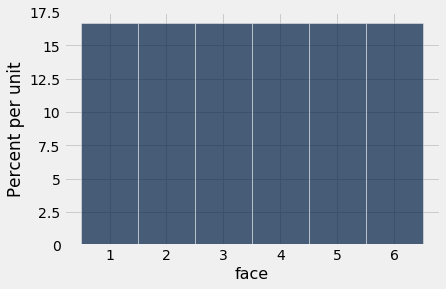

In [39]:
die.hist('face', bins = np.arange(0.5, 7, 1))

Above, we have 6 bars that correspond to each face. The height of each bars are the same, meaning the chance of getting any of the faces from rolling the die is equally likely. **This is what a probability histogram looks like**: it represents a distribution of probability for each particular event.

## Empirical Distribution
"What is the distribution of the results based on just random chance?"

For example, if we roll the dice multiple times and looked at how many times we get each face, we can make a histogram out of the results. This histogram is what is called an **empirical distribution**.

1. Empirical distribution is a distribution that is **based on observation**


2. Usually the observations are repetitions from an experiment

    * e.g. roll a die multiple times and construct a histogram from the outcomes
    
    
3. What to be observed:

    * All observed values
    * The proportion of counts of each value


## Demo
Let's take a simulation of rolling the die 10 times,

In [40]:
die.sample(10)

face
4
4
5
2
4
6
4
4
2
4


We can use the result of the simulation to create an empirical histogram,

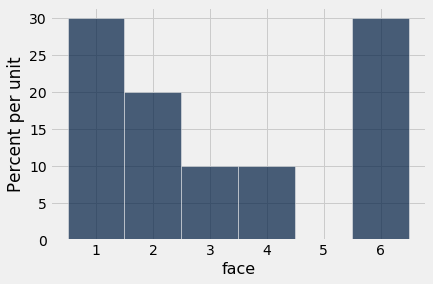

In [44]:
die.sample(10).hist('face', bins = np.arange(0.5, 7, 1))

It looks like the empirical histogram doesn't look like the probability histogram. This is because we used a small sample size (10 rolls). The greater the sample size, the more the empirical histogram would resemble the probability histogram.

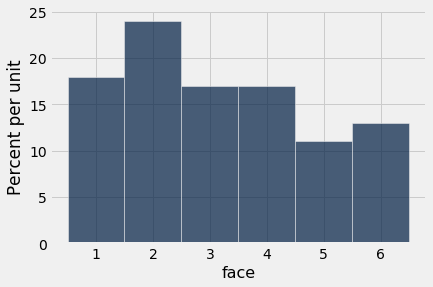

In [45]:
die.sample(100).hist('face', bins = np.arange(0.5, 7, 1))

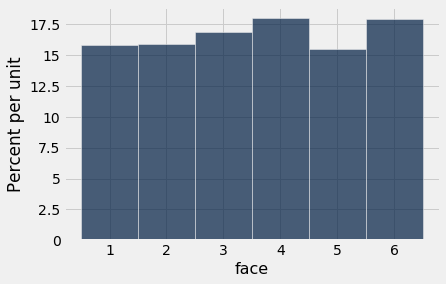

In [46]:
die.sample(1000).hist('face', bins = np.arange(0.5, 7, 1))

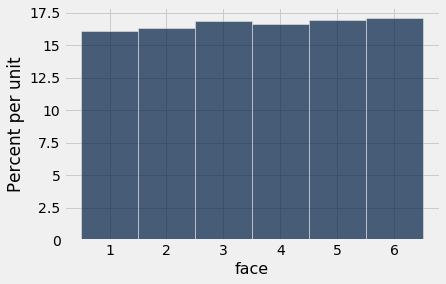

In [47]:
die.sample(10000).hist('face', bins = np.arange(0.5, 7, 1))

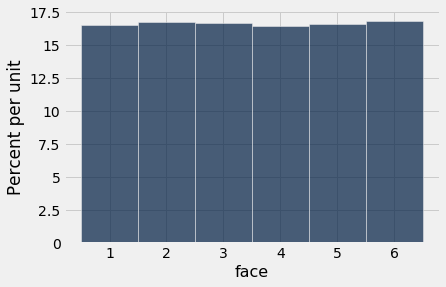

In [48]:
die.sample(100000).hist('face', bins = np.arange(0.5, 7, 1))

The analogy: if we keep rolling the die multiple times (even millions of times), we will see each of the 6 values in an equal rate.

# Large Random Samples
An important thing about sampling is that when we have a large random sample, the **Law of Averages** applies.

## Law of Averages
The law of averages states:

**"If a chance experiment is repeated many times, independently and under the same conditions (e.g. nothing changes in-between dice rolls, no outside influence), then the proportion or probability of times that event occurs gets closer to the theoretical probability of the event. "**

In other words, as we increase the number of die rolls, the proportion or probability of times we get 5 is getting closer to 1/6.

Another way of stating it:
" If the sample size is large, then the empirical distribution of a uniform random sample resembles the distribution of the population with high probability." 

It won't always exactly match the probability distribution. If we roll a die 1000 times, we could in theory get 1000 times of 1. However, with high probability, it is way more likely that we will get the distribution of faces that resembles the original probability distribution. This is important because in some situation, we don't know what the original probability (population) distribution looks like.